In [1]:
import pandas as pd
import matplotlib.pyplot as plt
Bank_Data = pd.read_csv("bank-full.csv")

Index([ 'age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"],dtype='object')

In [2]:
#Assigning Bank Data to the columns from bank-full.csv
split_data = Bank_Data['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"'].str.split(";",expand = True, n=16)

In [3]:
#Renamming the numbered columns to the appropriate column names for clarity 
split_data.rename(columns={0:"age", 1:"job", 2:"marital" ,3:"education", 4:"default",5:"balance",6:"housing",7:"loan",8:"contact",9:"day",10:"month",11:"duration",12:"campaign",13:"Pdays",14:"previous",15:"p_outcome",16:"Y"}, inplace =True)

In [4]:
#Same as using Inplace function
split_data["job"] = split_data["job"].str.replace('"',"")

## Removing Quotes in Each Column ##

In [5]:
split_data["marital"] = split_data["marital"].str.replace('"',"")

In [6]:
split_data["education"] = split_data["education"].str.replace('"',"")

In [7]:
split_data["default"] = split_data["default"].str.replace('"',"")

In [8]:
split_data["housing"] = split_data["housing"].str.replace('"',"")

In [9]:
split_data["loan"] = split_data["loan"].str.replace('"',"")

In [10]:
split_data["contact"] = split_data["contact"].str.replace('"',"")

In [11]:
split_data["month"] = split_data["month"].str.replace('"',"")

In [12]:
split_data["p_outcome"] = split_data["p_outcome"].str.replace('"',"")

In [13]:
split_data["Y"] = split_data["Y"].str.replace('"',"")

In [14]:
#Cleaned csv table
split_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,Pdays,previous,p_outcome,Y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [15]:
split_data["job"]

0          management
1          technician
2        entrepreneur
3         blue-collar
4             unknown
             ...     
45206      technician
45207         retired
45208         retired
45209     blue-collar
45210    entrepreneur
Name: job, Length: 45211, dtype: object

In [16]:
#Converting age column to an integer to find the average
y= split_data["age"].astype("int").mean()

In [17]:
#Used both age and balance columnns to into integers, then setting data to be grouped by "age"
split_data[["age","balance"]] = split_data[["age", "balance"]].astype("int")
m = split_data.groupby("age")

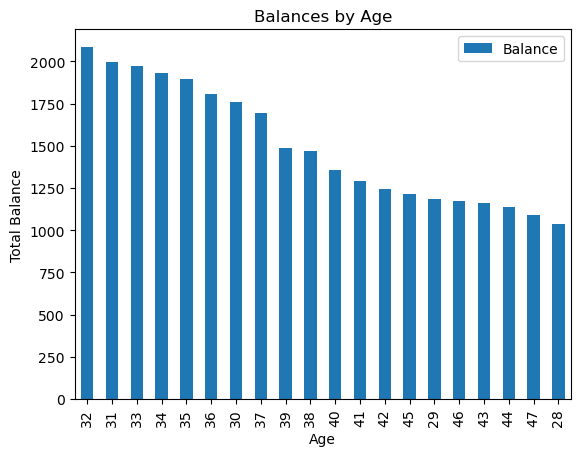

In [64]:
#Bar graph
split_data["age"].value_counts().sort_values(ascending = False).head(n=20).plot(kind = "bar", legend = True)
plt.title("Balances by Age")
plt.xlabel("Age")
plt.ylabel("Total Balance")
plt.legend(['Balance'])
plt.show()

In [19]:
#Avg Bank Balance
split_data["balance"].astype("int").mean()

1362.2720576850766

In [20]:
#Maximunm Bank Balance
split_data["balance"].astype("int").max()

102127

In [21]:
#Minimunm Bank Balance
split_data["balance"].astype("int").min()

-8019

In [22]:
#Median Bank Balance
split_data["balance"].astype("int").median()

448.0

In [23]:
#Display current balance column
split_data["balance"]

0        2143
1          29
2           2
3        1506
4           1
         ... 
45206     825
45207    1729
45208    5715
45209     668
45210    2971
Name: balance, Length: 45211, dtype: int32

In [24]:
#Defining balance checker to determine customer balance
def balance_checker(amount):
    if amount<0:
        return "Negative balance customer"
    elif amount>0:
        return "Positive balance customer"
    else:
        return "Amount not found"


In [25]:
#Assigning balance checker variable
split_data["balance_checker"] = split_data["balance"].astype("int").apply(balance_checker)

In [26]:
split_data["balance_checker"]

0        Positive balance customer
1        Positive balance customer
2        Positive balance customer
3        Positive balance customer
4        Positive balance customer
                   ...            
45206    Positive balance customer
45207    Positive balance customer
45208    Positive balance customer
45209    Positive balance customer
45210    Positive balance customer
Name: balance_checker, Length: 45211, dtype: object

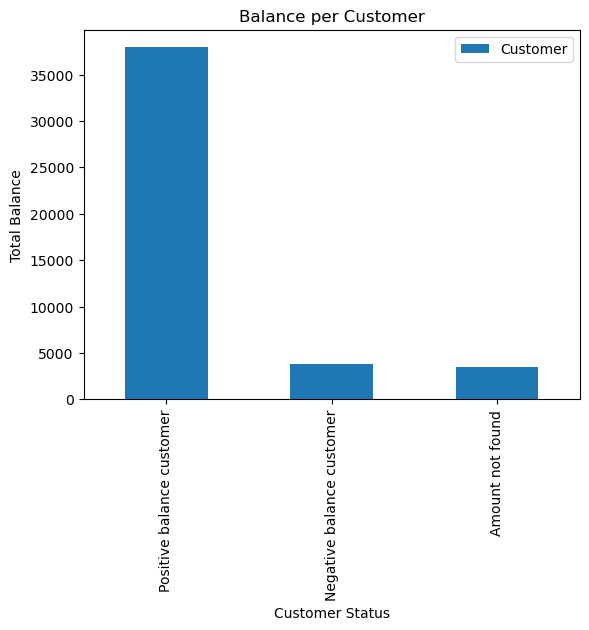

In [61]:
#Bar graph showing customer (+) or (-) balance
split_data["balance_checker"].value_counts().sort_values(ascending = False).plot(kind = "bar", legend = True)
plt.title("Balance per Customer")
plt.xlabel("Customer Status")
plt.ylabel("Total Balance")
plt.legend(['Customer'])
plt.show()

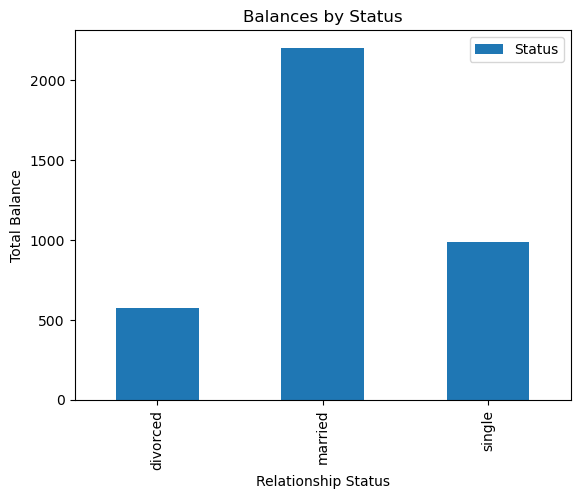

In [62]:
#Creating Bar Graph via Marital Status
my_group = split_data[split_data["balance_checker"]=="Negative balance customer"].groupby("marital")
my_group.agg({"marital":"count"}).plot(kind= "bar", legend = True)
plt.title("Balances by Status")
plt.xlabel("Relationship Status")
plt.ylabel("Total Balance")
plt.legend(['Status'])
plt.show()

In [29]:
split_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,Pdays,previous,p_outcome,Y,balance_checker
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Positive balance customer
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Positive balance customer
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Positive balance customer
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Positive balance customer
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Positive balance customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,Positive balance customer
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,Positive balance customer
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,Positive balance customer
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,Positive balance customer


In [30]:
#Converted split_data[balance] to integer, then created edu_group to get average by balance of each education group 
split_data["balance"] =split_data["balance"].astype("int")
edu_group = split_data.groupby("education").agg({"balance" : "mean"}).sort_values(by = "balance" , ascending = False)

In [31]:
edu_group

,balance
education,
tertiary,1758.416435
unknown,1526.754443
primary,1250.949934
secondary,1154.880786


In [33]:
#Top 10 bank balance
Top_10_balance = split_data["balance"].sort_values(ascending = False).head(n=10)

In [34]:
#Top 10 balance for all
Top_10_balance_all = split_data[split_data.index.isin(Top_10_balance.index)]

In [35]:
Top_10_balance_all

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,Pdays,previous,p_outcome,Y,balance_checker
12926,56,blue-collar,married,secondary,no,58932,no,no,telephone,7,jul,339,2,-1,0,unknown,no,Positive balance customer
19420,59,admin.,married,unknown,no,64343,no,no,cellular,6,aug,45,4,-1,0,unknown,no,Positive balance customer
19785,56,management,divorced,tertiary,no,66721,no,no,cellular,8,aug,442,2,-1,0,unknown,no,Positive balance customer
21192,52,blue-collar,married,primary,no,66653,no,no,cellular,14,aug,109,3,-1,0,unknown,no,Positive balance customer
26227,59,management,married,tertiary,no,98417,no,no,telephone,20,nov,145,5,-1,0,unknown,no,Positive balance customer
39989,51,management,single,tertiary,no,102127,no,no,cellular,3,jun,90,1,-1,0,unknown,no,Positive balance customer
41374,32,entrepreneur,single,tertiary,no,59649,no,no,cellular,1,sep,69,2,-1,0,unknown,no,Positive balance customer
41693,60,retired,married,primary,no,71188,no,no,cellular,6,oct,205,1,-1,0,unknown,no,Positive balance customer
42558,84,retired,married,secondary,no,81204,no,no,telephone,28,dec,679,1,313,2,other,yes,Positive balance customer
43393,84,retired,married,secondary,no,81204,no,no,telephone,1,apr,390,1,94,3,success,yes,Positive balance customer


In [36]:
#
Top_10_balance_all["job"].value_counts()

job
management      3
retired         3
blue-collar     2
admin.          1
entrepreneur    1
Name: count, dtype: int64

In [37]:
Customers = split_data[split_data["Y"]=='yes']

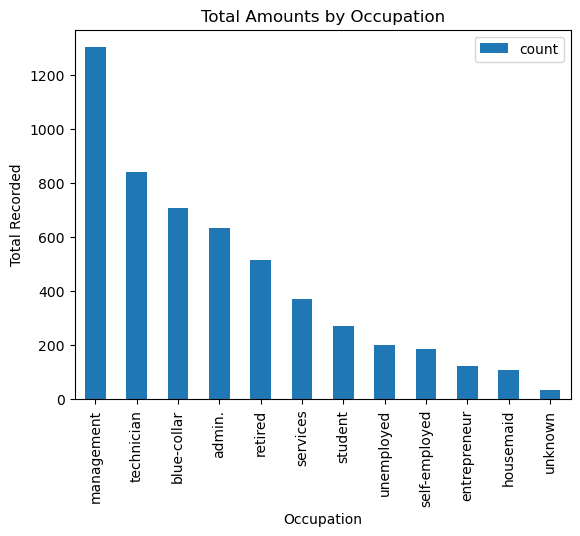

In [54]:
Customers["job"].value_counts().sort_values(ascending = False).plot(kind="bar", legend = True)
plt.title("Total Amounts by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Total Recorded")
plt.show()

In [39]:
split_data['Y'].value_counts()

Y
no     39922
yes     5289
Name: count, dtype: int64

In [40]:
def into_numbers(column_name):
    if column_name=='yes':
        return 1
    elif column_name=='no':
        return 0
    else:
        return "column name was not found"

In [41]:
split_data["Outcome_Variable"]= split_data['Y'].apply(into_numbers)

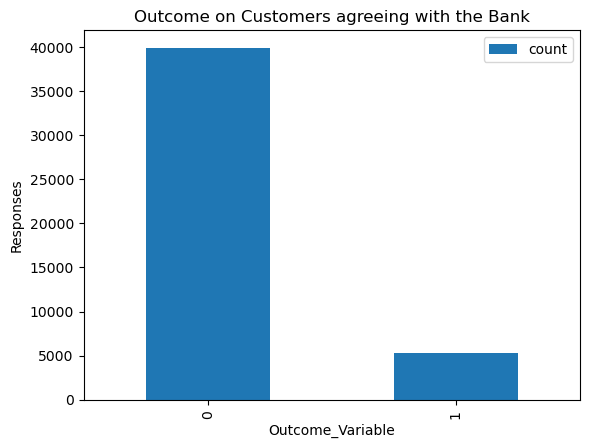

In [71]:
split_data["Outcome_Variable"].value_counts().plot(kind="bar", legend = True)
plt.title("Outcome on Customers agreeing with the Bank")
plt.xlabel("Outcome_Variable")
plt.ylabel("Responses")
plt.show()

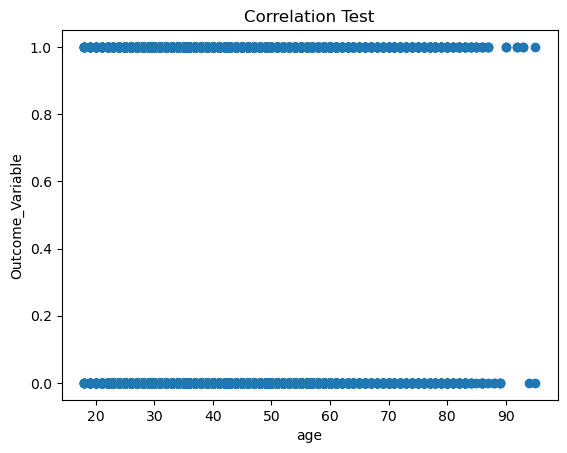

In [53]:
#Scatterplot proves no correlation
plt.scatter(x= split_data.age.astype("float"), y=split_data.Outcome_Variable.astype("float"))
plt.title("Correlation Test")
plt.xlabel("age")
plt.ylabel("Outcome_Variable")
plt.show()

In [44]:
#Displays Age column values
split_data.age

0        58
1        44
2        33
3        47
4        33
         ..
45206    51
45207    71
45208    72
45209    57
45210    37
Name: age, Length: 45211, dtype: int32

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
#Training our age and balance from our Split Data with ouir Outcome Variable
X_train, X_test, Y_train, Y_test = train_test_split(split_data[['age', 'balance']], split_data["Outcome_Variable"], test_size = 0.1)

In [47]:
X_train
Y_train

2780     0
31032    1
18274    0
40973    0
29777    0
        ..
40350    1
18728    0
39300    0
4704     0
8598     0
Name: Outcome_Variable, Length: 40689, dtype: int64

In [48]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [49]:
#Displays integer value for X_test
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
#Likely chance of the model succeeding 
model.score(X_test, Y_test)

0.8850066342326405

In [51]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [52]:
#Probabilitlity Test
model.predict_proba(X_test)

array([[0.8929736 , 0.1070264 ],
       [0.88835018, 0.11164982],
       [0.88760477, 0.11239523],
       ...,
       [0.84978886, 0.15021114],
       [0.88344498, 0.11655502],
       [0.88572247, 0.11427753]])